In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [50]:
predictions_df = pd.read_pickle('../data/predictions/lstm_classifier_USDJPY-5m-20210101-20241231-CUSUM_0.001-TB.pkl')

In [51]:
predictions_df.head()

,t1,trgt,ret,bin,bin_class,prob_0,prob_1,prob_2,prediction,pred_side,confidence
timestamp,,,,,,,,,,,
2021-01-07 14:35:00,2021-01-07 15:05:00,0.000487,0.000573,1.0,2.0,0.381785,0.216151,0.402065,2.0,1.0,0.402065
2021-01-07 15:10:00,2021-01-07 15:15:00,0.000532,0.000611,1.0,2.0,0.381785,0.216151,0.402065,2.0,1.0,0.402065
2021-01-07 16:05:00,2021-01-07 17:00:00,0.000602,0.000679,1.0,2.0,0.381785,0.216151,0.402065,2.0,1.0,0.402065
2021-01-07 17:10:00,2021-01-07 17:25:00,0.000452,0.000582,1.0,2.0,0.381785,0.216151,0.402065,2.0,1.0,0.402065
2021-01-08 08:25:00,2021-01-08 09:00:00,0.000432,0.000529,1.0,2.0,0.381785,0.216151,0.402065,2.0,1.0,0.402065


In [52]:
predictions_df['bin_class'].unique()

array([2., 0., 1.])

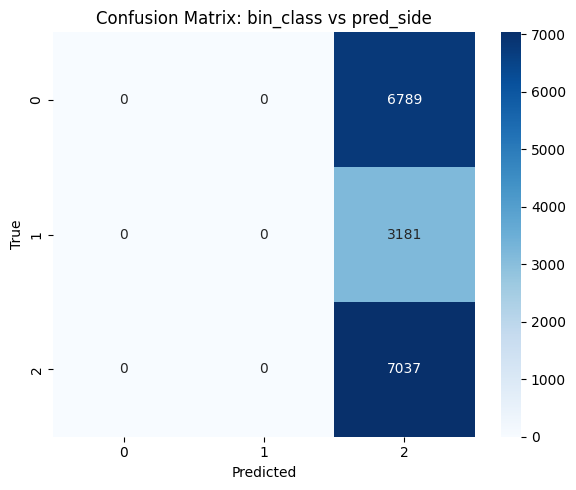

In [53]:
# 將類別轉為整數型別
y_true = predictions_df["bin_class"].astype(int)
y_pred = predictions_df["prediction"].astype(int)

# 計算混淆矩陣
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])


# 繪圖
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix: bin_class vs pred_side")
plt.tight_layout()
plt.show()
